<h1>install dan import library</h1>

install library python

In [ ]:
!pip install pandas matplotlib seaborn numpy

import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import data dari file csv

In [6]:

df = pd.read_csv("indonesian-names.csv")


lihat data

In [7]:
df

,Nama,Jenis_Kelamin
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


<h1>Cleaning Data</h1>

In [8]:
df = (
    df
    .dropna()
    .drop_duplicates()
    
    
)
df = df.select_dtypes(include='object')
df

,Nama,Jenis_Kelamin
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


<h1>Distribusi nama berdasarkan kelamin</h1>

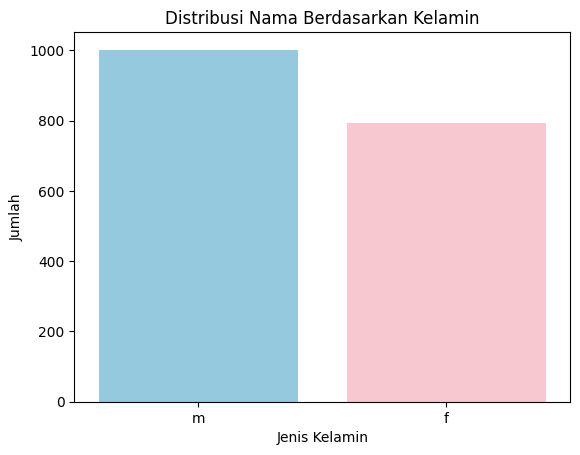

In [9]:
sns.countplot(x='Jenis_Kelamin', data=df,palette={'m':'skyblue','f':'pink'},hue='Jenis_Kelamin',legend=False)
plt.title('Distribusi Nama Berdasarkan Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

<h1>panjang nama</h1>

In [13]:
df["panjang_nama"]=df["Nama"].str.len()
df

,Nama,Jenis_Kelamin,panjang_nama
0,hafizhan shidqi,m,15
1,gandhi wibowo,m,13
2,aldio mahendra purwandrarto,m,27
3,benny putra,m,11
4,vicky vernando dasta,m,20
...,...,...,...
1955,hadimah,f,7
1956,aprillia rahma wati,f,19
1957,muhamad khoirunisa. m,m,21
1958,sukandi,m,7


<h3>distribusi panjang nama</h3>

In [ ]:
average=(df["panjang_nama"]).mean()
std_dev=df["panjang_nama"].std()
size=df["panjang_nama"].count()
df_stat=pd.DataFrame({
    "mean":[average],
    "std_dev":[std_dev],
    "size":[size]
})
df_stat


,mean,std_dev,size
0,12.773385,5.085715,1796


<h3>distibusi normal hypotetical</h3>

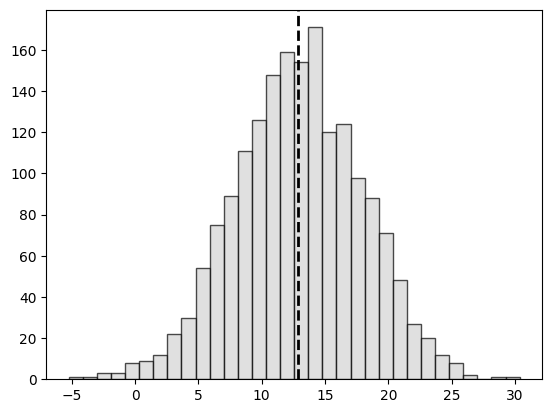

In [42]:
#theoritical data
normal_dist=np.random.normal(average,std_dev,size)
plt.hist(normal_dist,bins='auto',color='lightgray',edgecolor='black',alpha=0.7)
plt.axvline(normal_dist.mean(),color='k',linestyle='dashed',linewidth=2)



<h3>distribusi normal actual</h3>

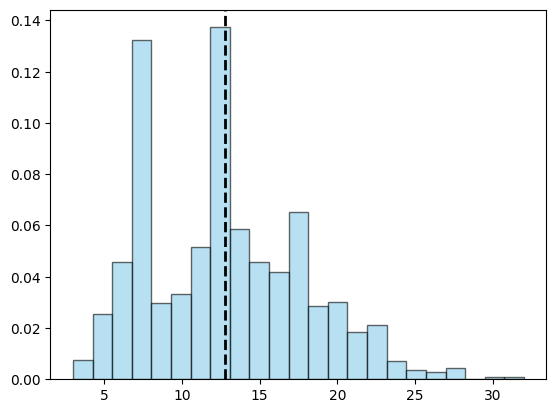

In [43]:
#actual data distribution
plt.hist(df["panjang_nama"],bins='auto',density=True,alpha=0.6,color='skyblue',edgecolor='black',label="data asli")
plt.axvline(average,color='k',linestyle='dashed',linewidth=2)
plt.show()

<h3>distribusi normal overlayed</h3>

<h2>panjang nama laki-laki</h2>

<h3>distribusi normal panjang nama laki-laki</h3>

<h2>panjang nama perempuan</h2>

<h3>distribusi normal panjang nama perempuan</h3>